<a href="https://colab.research.google.com/github/guru3/ML-Insights/blob/master/3.%20Deep%20Learning%20on%20properly%20and%20randomly%20labelled%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We are going to train neural networks on properly labelled data as well as data randomly labelled! From what I understand about neural network, if network is appropriately big enough, network would learn a mapping for that data too! However, given the lack of structure in how the labels are assigned, we want to poke upon if there is different in convergence timings for both datasets!

In [1]:
%matplotlib inline

from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

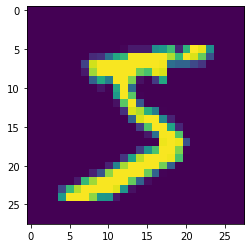

In [3]:
#Let's look at one example
_ = plt.imshow(x_train_raw[0])

In [4]:
print(x_train_raw.shape, y_train_raw.shape) #we will have to change categorical

(60000, 28, 28) (60000,)


In [0]:
training_examples = 50000
validation_examples = 10000
testing_examples = y_test_raw.shape[0]

In [0]:
#data normalization
x_train_imd = x_train_raw/255
x_test_imd = x_test_raw/255
x_train_imd = x_train_imd.reshape(x_train_imd.shape[0],x_train_imd.shape[1],x_train_imd.shape[2],1)
x_test_imd = x_test_imd.reshape(x_test_imd.shape[0],x_train_imd.shape[1],x_train_imd.shape[2],1)

total_classes = 10 #number of digits
y_train_imd = keras.utils.to_categorical(y_train_raw, total_classes)
y_test_imd = keras.utils.to_categorical(y_test_raw, total_classes)

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(total_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

In [0]:
def get_correct_data():
    permutation = np.random.permutation(x_train_imd.shape[0])
    
    X_train_, X_valid_ = x_train_imd[:training_examples], x_train_imd[training_examples:]
    Y_train_, Y_valid_ = y_train_imd[:training_examples], y_train_imd[training_examples:]
    
    return( (X_train_, Y_train_), (X_valid_, Y_valid_), (x_test_imd, y_test_imd) )

def get_random_data():
    permutation = np.random.permutation(x_train_imd.shape[0])
    
    X_train_, X_valid_ = x_train_imd[:training_examples], x_train_imd[training_examples:]
    Y_train_ = keras.utils.to_categorical( np.random.randint(total_classes, size=training_examples), total_classes )
    Y_valid_ = keras.utils.to_categorical( np.random.randint(total_classes, size=validation_examples), total_classes )
    Y_test_  = keras.utils.to_categorical( np.random.randint(total_classes, size=testing_examples), total_classes )

    return( (X_train_, Y_train_), (X_valid_, Y_valid_), (x_test_imd, Y_test_) )

In [9]:
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_correct_data()
model_correct = model()
history_correct = model_correct.fit(X_train, Y_train, batch_size=128, epochs=10, 
                  validation_data=(X_valid,Y_valid))
score = model_correct.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.3223 - accuracy: 0.8989 - val_loss: 0.0962 - val_accuracy: 0.9720
Epoch 2/10
50000/50000 [==============================] - 2s 48us/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.0595 - val_accuracy: 0.9819
Epoch 3/10
50000/50000 [==============================] - 2s 48us/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 4/10
50000/50000 [==============================] - 2s 47us/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0504 - val_accuracy: 0.9856
Epoch 5/10
50000/50000 [==============================] - 2s 48us/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 6/10
50000/50000 [==============================] - 2s 47us/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0521 - val_accuracy: 0.9857
Epoch 7/10
50000/50000 [==============================] - 2s 48us/st

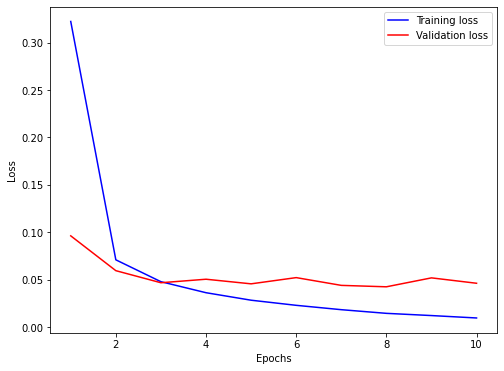

In [10]:
plt.figure(figsize=(8,6))
loss = history_correct.history['loss']
val_loss = history_correct.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

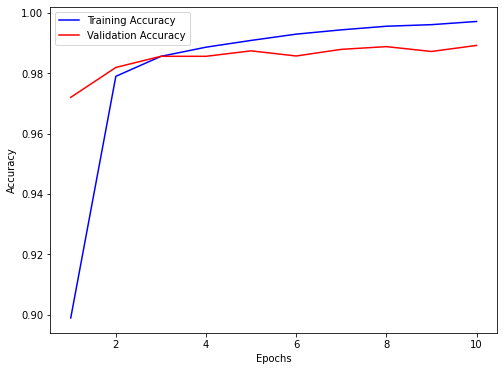

In [11]:
plt.figure(figsize=(8,6))
loss = history_correct.history['accuracy']
val_loss = history_correct.history['val_accuracy']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_random_data()

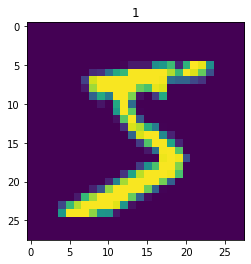

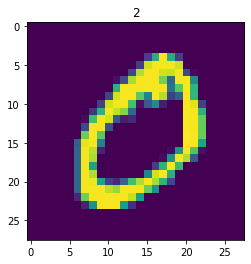

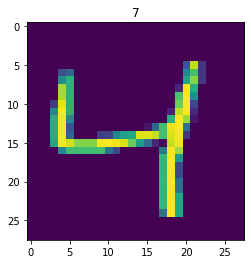

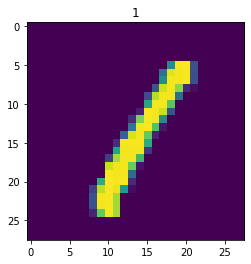

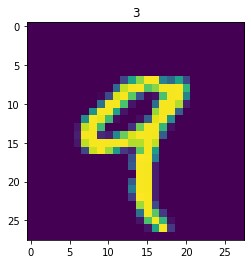

In [13]:
for i in range(5):
    plt.imshow(X_train[i][:,:,0])
    plt.title(np.argmax(Y_train[i]))
    plt.show()

In [14]:
model_random = model()
history_random = model_random.fit(X_train, Y_train, batch_size=128, epochs=50, 
                  validation_data=(X_valid,Y_valid))
score_random = model_random.evaluate(X_test,Y_test)
print('Test loss:', score_random[0])
print('Test accuracy:', score_random[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3030 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.1054
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3025 - val_accuracy: 0.1054
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3024 - accuracy: 0.1041 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3020 - accuracy: 0.1050 - val_loss: 2.3025 - val_accuracy: 0.0993
Epoch 7/50
50000/50000 [==============================] - 2s 48us/st

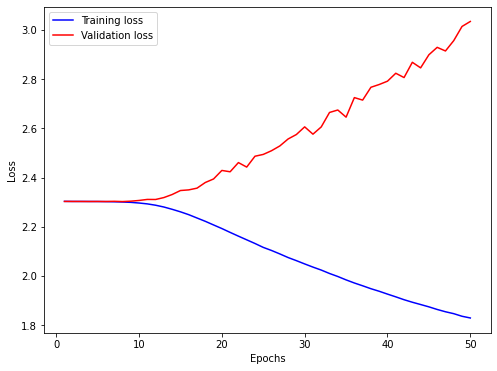

In [15]:
plt.figure(figsize=(8,6))
loss = history_random.history['loss']
val_loss = history_random.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

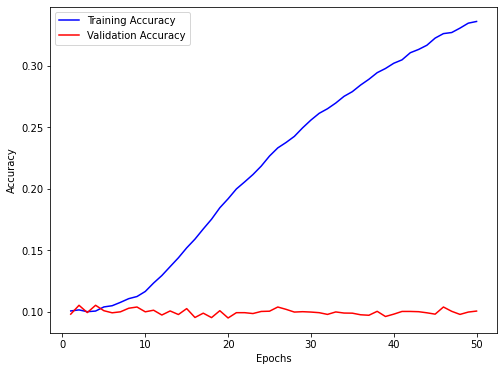

In [16]:
plt.figure(figsize=(8,6))
loss = history_random.history['accuracy']
val_loss = history_random.history['val_accuracy']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Okay..we are getting there. This looks promising!!..but takes more iterations than usual suggesting it's easier to find patterns in structured data and that makes sense. Let's increase the size of the input network and run for around 100 iterations and see if we can achieve 99+% accuracy on the training data

In [0]:
def model_big():
    model = Sequential()
    model.add(Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1) ))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(total_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

In [18]:
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_correct_data()
model_correct_big = model_big()
history_correct_big = model_correct_big.fit(X_train, Y_train, batch_size=128, epochs=10,
                  validation_data=(X_valid,Y_valid))
score = model_correct_big.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 112us/step - loss: 0.2031 - accuracy: 0.9373 - val_loss: 0.0568 - val_accuracy: 0.9853
Epoch 2/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0495 - val_accuracy: 0.9873
Epoch 3/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 4/10
50000/50000 [==============================] - 5s 105us/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 5/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0369 - val_accuracy: 0.9911
Epoch 6/10
50000/50000 [==============================] - 5s 105us/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0388 - val_accuracy: 0.9908
Epoch 7/10
50000/50000 [==============================] - 5s 1

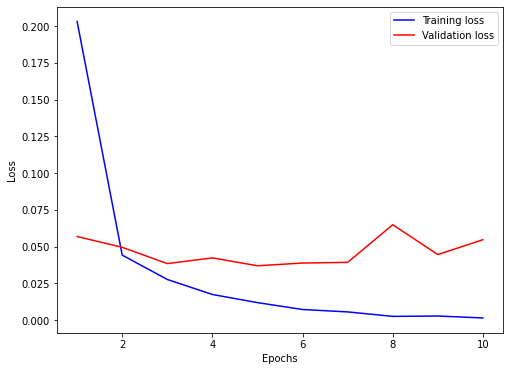

In [19]:
plt.figure(figsize=(8,6))
loss = history_correct_big.history['loss']
val_loss = history_correct_big.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
(X_train, Y_train), (X_valid,Y_valid), (X_test,Y_test) = get_random_data()
model_random_big = model_big()
history_random_big = model_random_big.fit(X_train, Y_train, batch_size=128, epochs=60, # more iterations 
                  validation_data=(X_valid,Y_valid))
score_random = model_random_big.evaluate(X_test,Y_test)
print('Test loss:', score_random[0])
print('Test accuracy:', score_random[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 5s 110us/step - loss: 2.3030 - accuracy: 0.1012 - val_loss: 2.3025 - val_accuracy: 0.1027
Epoch 2/60
50000/50000 [==============================] - 5s 105us/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3024 - val_accuracy: 0.1007
Epoch 3/60
50000/50000 [==============================] - 5s 105us/step - loss: 2.3026 - accuracy: 0.1038 - val_loss: 2.3028 - val_accuracy: 0.1027
Epoch 4/60
50000/50000 [==============================] - 5s 106us/step - loss: 2.3025 - accuracy: 0.1036 - val_loss: 2.3031 - val_accuracy: 0.0955
Epoch 5/60
50000/50000 [==============================] - 5s 105us/step - loss: 2.3020 - accuracy: 0.1065 - val_loss: 2.3034 - val_accuracy: 0.1016
Epoch 6/60
50000/50000 [==============================] - 5s 106us/step - loss: 2.3008 - accuracy: 0.1118 - val_loss: 2.3037 - val_accuracy: 0.0991
Epoch 7/60
50000/50000 [==============================] - 5s 1

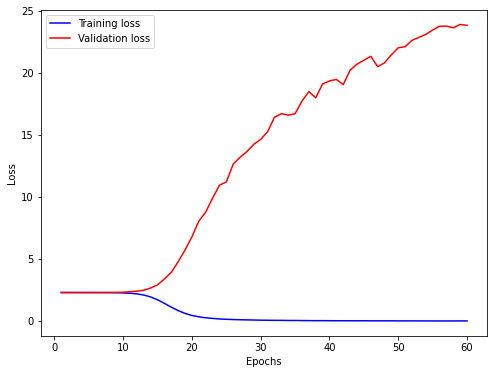

In [21]:
plt.figure(figsize=(8,6))
loss = history_random_big.history['loss']
val_loss = history_random_big.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### So what do we learn? Neural networks are well equipped to achieve good accuracy on randomly labelled data too, as the aim of network is to learn and generate best predictions for TRAINING data. Due to lack of structure in randomly labelled data, we see poor accuracy ( and increasing loss as we go ahead with iterations ) for validation data and testing data! This can be explained by lack of structure in the randomly labelled data and power of neural networks to achieve good accuracy on all such datasets too. This also signifies importance of using validation and testing data as well to have a more generalized model rather than one that overfits training data heavily!